In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [20]:
# Datan avaus

df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

# Ensimmäisten rivien listaus

In [21]:
df.head(n=10)

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
5,6,2,31,2,2.0,14.0,1910,4,4.0,5,2,4,1.0,1.0,NaN,NaN
6,7,1,49,1,2.0,16.0,2066,3,5.0,4,2,2,NaN,NaN,1.0,NaN
7,8,1,55,1,1.0,0.0,2066,3,5.0,3,1,3,1.0,NaN,NaN,NaN
8,9,1,40,2,1.0,23.0,2768,2,4.0,4,2,4,NaN,1.0,NaN,NaN
9,10,1,33,1,1.0,16.0,2106,3,2.0,1,1,1,1.0,NaN,NaN,NaN


*Here we found out nan values

In [22]:
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

In [23]:
df['years_of_service'].unique()

array([22., 10.,  7., 14.,  4., 16.,  0., 23., 21., 15., 12.,  2., 17.,
       20., 13., 27.,  1.,  3., nan, 24.,  5.,  9.,  6., 35., 28., 18.,
       36., 19.,  8.])

*Replacing the 'nan' values with 0

In [25]:
df.duplicated().sum()

0

In [26]:
df.isnull().sum()

number                    0
gender                    0
age                       0
family                    0
education                 0
years_of_service          0
salary                    0
sat_management            0
sat_colleques             0
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
healtcare                 0
holidayCabin              0
gym                       0
muscleCare                0
dtype: int64

In [28]:
df=df.drop(columns=['holidayCabin', 'muscleCare','gym' , 'healtcare'])
# Datan poisto mitä ei käytetä analyysissä


In [27]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,0,0,0,0
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,0,0,0,0
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,0,0,0
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,0,0,0
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,0,0,0


# Muuttujien summarointi

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   number                  82 non-null     int64 
 1   gender                  82 non-null     int64 
 2   age                     82 non-null     int64 
 3   family                  82 non-null     int64 
 4   education               82 non-null     object
 5   years_of_service        82 non-null     object
 6   salary                  82 non-null     int64 
 7   sat_management          82 non-null     int64 
 8   sat_colleques           82 non-null     object
 9   sat_workingEnvironment  82 non-null     int64 
 10  sat_salary              82 non-null     int64 
 11  sat_tasks               82 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 7.8+ KB


In [30]:
df[      ['education', 'years_of_service']     ].describe()

,education,years_of_service
count,82.0,82.0
unique,5.0,29.0
top,2.0,1.0
freq,30.0,9.0


Text(0.5, 0, 'Education levels, n=82')

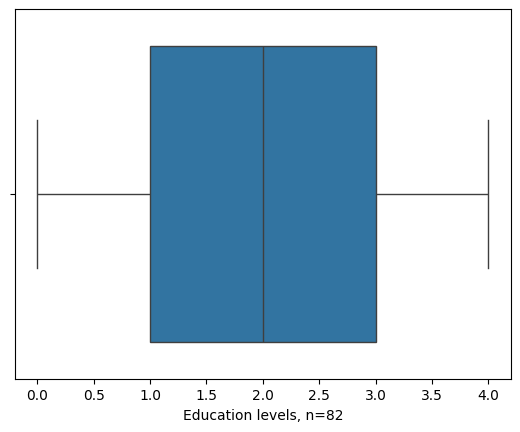

In [31]:
ax3 = sns.boxplot(x = df['education'])

ax3.set_xlabel('Education levels, n=' + str(df['education'].count()))

In [32]:
df.count()

number                    82
gender                    82
age                       82
family                    82
education                 82
years_of_service          82
salary                    82
sat_management            82
sat_colleques             82
sat_workingEnvironment    82
sat_salary                82
sat_tasks                 82
dtype: int64

In [33]:
for var in df:
    print(var, df[var].unique())

number [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82]
gender [1 2]
age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family [1 2]
education [1.0 2.0 3.0 4.0 '0']
years_of_service [22.0 10.0 7.0 14.0 4.0 16.0 0.0 23.0 21.0 15.0 12.0 2.0 17.0 20.0 13.0
 27.0 1.0 3.0 '0' 24.0 5.0 9.0 6.0 35.0 28.0 18.0 36.0 19.0 8.0]
salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management [3 1 2 4 5]
sat_colleques [3.0 5.0 4.0 2.0 '0']
sat_workingEnvironment [3 2 1 5 4]
sat_salary [3 1 2 4 5]
sat_tasks [3 2 4 1 5]


# Alkutoimet loppuu

# Luokittelevan muuttujan analysointi (Education)

In [35]:
df1=pd.crosstab(df['education'], 'Count')
df1

col_0,Count
education,
1.0,27
2.0,30
3.0,22
4.0,2
0,1


In [37]:
df1.index=['Primary school','Secondary School Graduate','Bachelor','Master']
df1.columns.name=''
df1

ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

# Graafit Education muuttujalle

* Muuttuja education on ordinaalinen muuttuja koska sillä voi olla useita arvoja, jotka voidaan järjestää järjestykseen

In [ ]:
df1.plot.barh()

In [ ]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count, N=102')

* Percentual

In [ ]:
df2 = pd.crosstab(df['education'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum() * 100
df2.index = ['Primary school','Secondary School Graduate','Bachelor','Master' ]
df2.columns.name = ''
df2

In [ ]:
df2['%'].plot.barh(zorder = 2)

plt.title('Education distribution')

plt.xlabel('%, n = ' + str(df2['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

# Percentual pie chart of education distribution in the company for better readability

In [ ]:
education = ['Primary school','Secondary School','Bachelor','Master' ]
levels = ['27', '30', '22', '2']
plt.figure(figsize=(6,10))

plt.pie(levels, labels=education, startangle=0, explode=[0,0,0,0.2], autopct="%1.1f%%")
plt.title("Educational Distribution within the company")
plt.xlabel('Count, N=82')
plt.show()

# Numeerisen muuttujan analysointi (Years of Service)

In [ ]:
df[      ['years_of_service']     ].describe()

In [ ]:
bins = [0,5,10,15,20,25,30,35,40,45]

In [ ]:
df['Years'] = pd.cut(df['years_of_service'], bins = bins)
df

In [ ]:
df3 = pd.crosstab(df['years_of_service'], 'Count')

df3.columns.name = ''

# Percentages
n = df3['Count'].sum()
df3['%'] = df3 / n * 100
df3

In [ ]:
type(df3.index.values[0])

In [ ]:
df3.index = df3.index.astype(str)
df3.loc['Total'] = df3.sum()
df3

In [ ]:
df3.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

In [ ]:
df['years_of_service'].hist(bins = bins)

plt.xlabel('Years of service')
plt.ylabel('Frequency')